In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("Pokemon (1).csv")

In [3]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [5]:
df['CAS'] = df['Attack'] + df['Sp. Atk'] + (df['Speed'] * 0.5)


In [6]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,CAS
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,136.5
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,172.0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,222.0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,262.0
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,144.5


In [7]:
X = df[['Total', 'HP', 'Defense', 'Sp. Def']]
y = df['CAS']

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Create and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 76.9059


Mean Squared Error: 76.9059
value of w is - [185.89986665  98.36550954 -18.64561244 -21.91445043 -23.7234592 ]


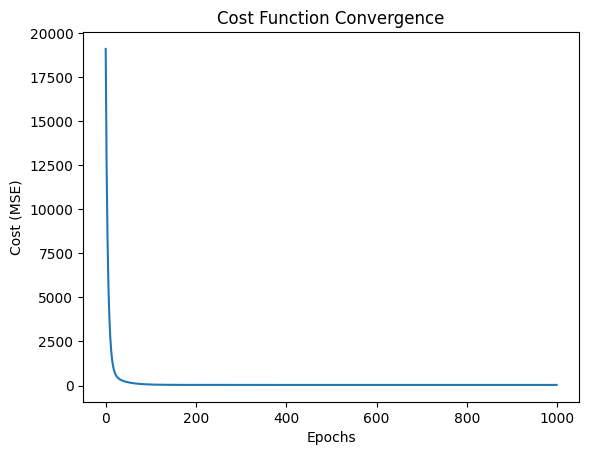

In [41]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Gradient Descent implementation for Linear Regression
def gradient_descent(X, y, learning_rate=0.0999999999999, epochs=1000):
    m = len(y)  # Number of training examples
    theta = np.zeros(X.shape[1])  # Initialize weights to zeros
    cost_history = []  # To store the cost history for visualization

    for epoch in range(epochs):
        # Prediction using the current weights (theta)
        predictions = X.dot(theta)
        
        # Compute the cost function (Mean Squared Error)
        cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
        cost_history.append(cost)

        # Calculate the gradient (partial derivative of cost function with respect to theta)
        gradient = (1 / m) * X.T.dot(predictions - y)
        
        # Update the weights (theta) using the gradient
        theta -= learning_rate * gradient
        
    return theta, cost_history

# Assuming df is your DataFrame
# Use selected features 'Total', 'HP', 'Defense', and 'Sp. Def' for X
X = df[['Total', 'HP', 'Defense', 'Sp. Def']]  # Input features
y = df['CAS']  # Target variable (CAS)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add intercept term to X (for the bias term in linear regression)
X_scaled = np.c_[np.ones(X_scaled.shape[0]), X_scaled]  # Add a column of ones for the intercept term

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Apply Gradient Descent to find the optimal weights (theta)
theta_optimal, cost_history = gradient_descent(X_train, y_train)
# Make predictions on the test set
y_pred = X_test.dot(theta_optimal)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"value of w is - {theta_optimal}")
# Plot the cost function history to see the convergence
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel('Epochs')
plt.ylabel('Cost (MSE)')
plt.title('Cost Function Convergence')
plt.show()


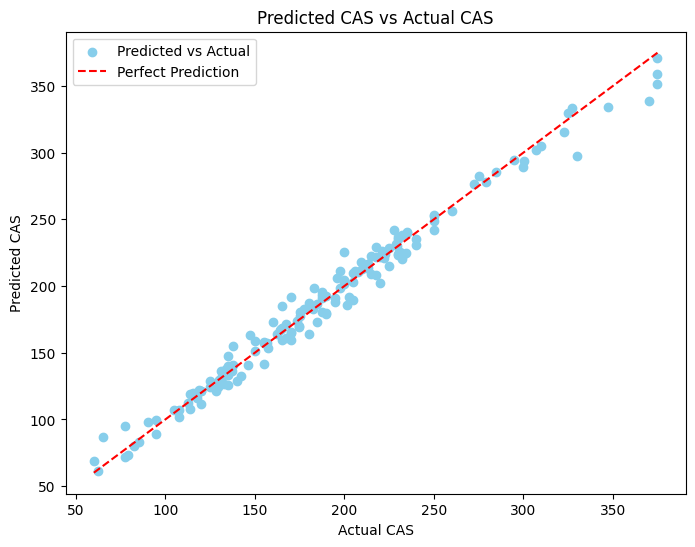

In [38]:
# Plot Predicted CAS vs Actual CAS
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='skyblue', label='Predicted vs Actual')  # Corrected the color specification
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual CAS')
plt.ylabel('Predicted CAS')
plt.title('Predicted CAS vs Actual CAS')
plt.legend()
plt.show()

